# Data Science training from Sprints
In this notebook, we will visualize what we can from the given data from the Airbnb competition

## Welcome to Team 15

Team members: <br>
Mohamed Aly Elsayed Matar <br>
Mohamed Fathy <br>
Mohamed Abdelmoniem <br>
Karim Ashraf <br>
Ziad Assem <br>

In [3]:
#importing libraries we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['blue','green','orange','red'] #colors we will need in viualization

In [4]:
#now, let's get the data that we will work on
train_users = pd.read_excel(r'C:\Users\peace\Desktop\MHMD\0.Career\Activity and Courses\Sprints - Data Science\AirbnbData\Files\train_users_2.xlsx')
test_users = pd.read_excel(r'C:\Users\peace\Desktop\MHMD\0.Career\Activity and Courses\Sprints - Data Science\AirbnbData\Files\test_users.xlsx')

# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

print("We have", train_users.shape[0], "users in the training set and", test_users.shape[0], "in the test set.")
print("So, we have in total", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
So, we have in total 275547 users.


## Checking for empty and -unknown- values

In [3]:
#Now Lets check for any empty or unknown cells and change them to NaN so panda can read them
users.replace({'-unknown-':np.nan, '':np.nan})

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090300000000,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090500000000,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090600000000,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091000000000,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091200000000,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,cv0na2lf5a,2014-09-30,20140900000000,NaT,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
275543,zp8xfonng8,2014-09-30,20140900000000,NaT,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,NaN,NaN
275544,fa6260ziny,2014-09-30,20140900000000,NaT,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
275545,87k0fy4ugm,2014-09-30,20140900000000,NaT,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN


## Data Visulaization
From the data above we can visulaize the following: <br>

1.Percentage of NULL values in the data<br>
2.Users count with gender<br>
3.Most users' age<br>

4.Users count of every affiliate_channel type<br>
5.Users count of every affiliate_provider type<br>
6.Users count of every first_affiliate_tracked type<br>

7.Users percentage with signup method<br>
8.Users percentage with signup_app<br>
9.Users count with first_device_type<br>
10.Users count with first_browser<br>

11.Travelers percentage with country destination<br>
12.Ages' variation with countries<br>

## 1.Percentage of NULL values in the data


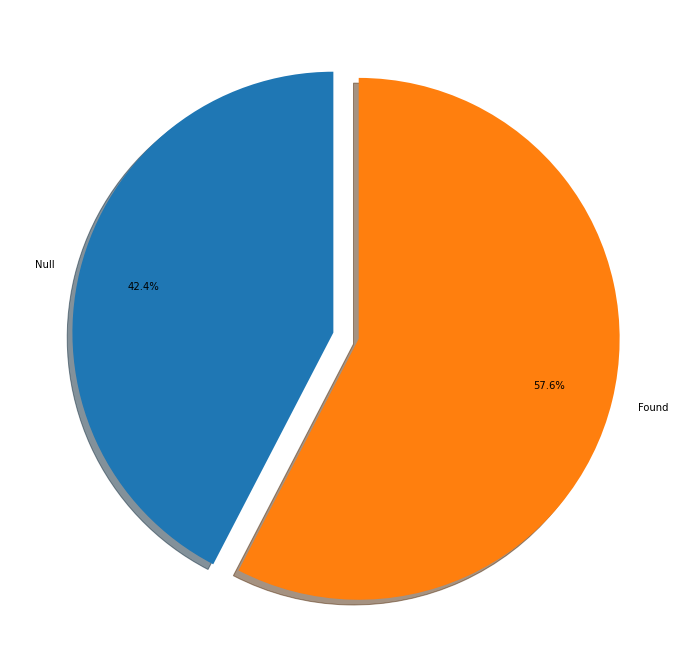

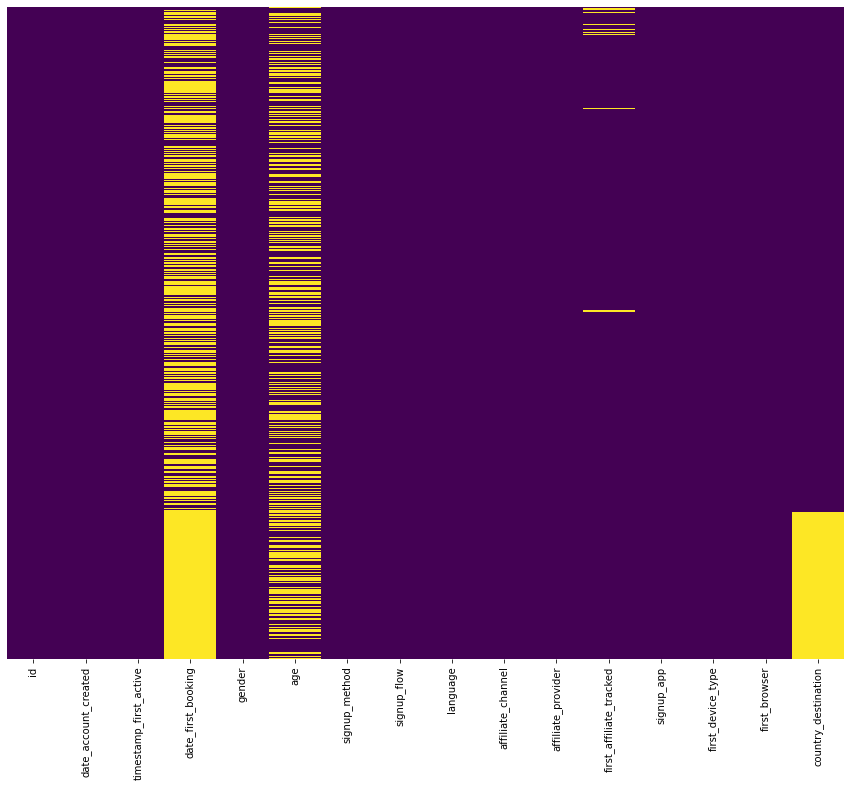

In [17]:
counter = int(users.shape[0])
counternull = int(users.isna().sum().sum())

labels = 'Null', 'Found'
sizes = [counter,counternull]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius = 1, pctdistance=0.75)
plt.show()

#let's do a heatmap too!
sns.heatmap(users.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.rcParams["figure.figsize"] = (20,10)

## 2.Users count with gender

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

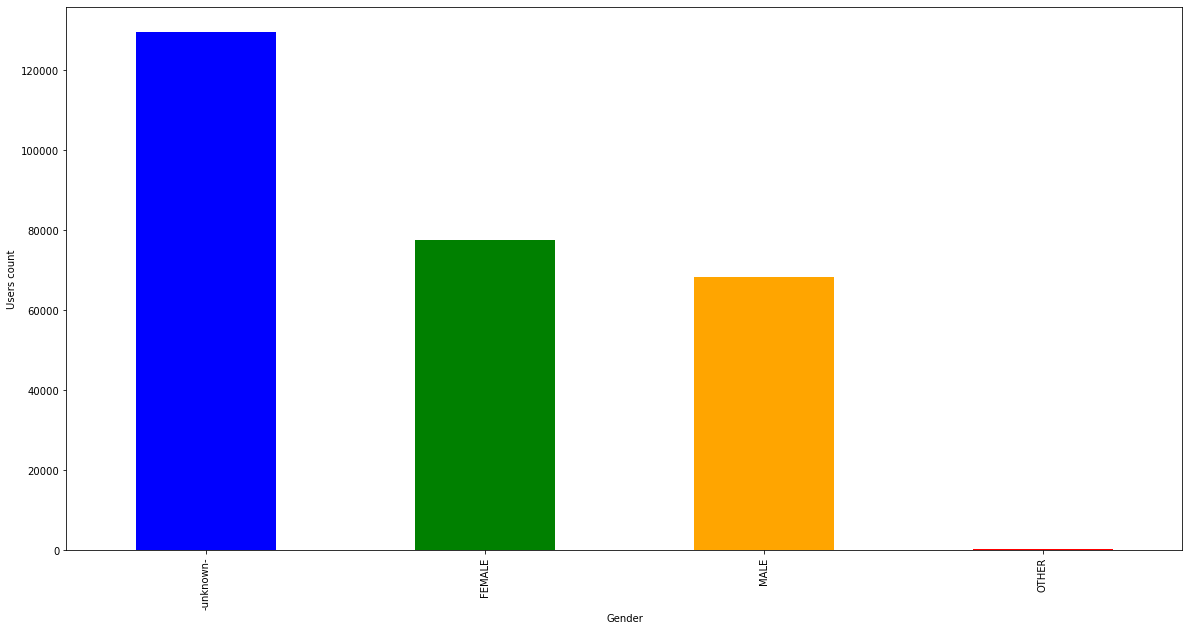

In [5]:
users.gender.value_counts(dropna=False).plot(kind = 'bar', color = colors)
plt.rcParams["figure.figsize"] = (10,7)
plt.xlabel('Gender')
plt.ylabel('Users count');

users.gender.value_counts()

We can notice that the female users are slightly higher than the male users

## 3.users' age

30.0    7712
28.0    7687
29.0    7647
31.0    7540
27.0    7462
        ... 
94.0      17
89.0      16
88.0      15
91.0      14
15.0       9
Name: age, Length: 81, dtype: int64

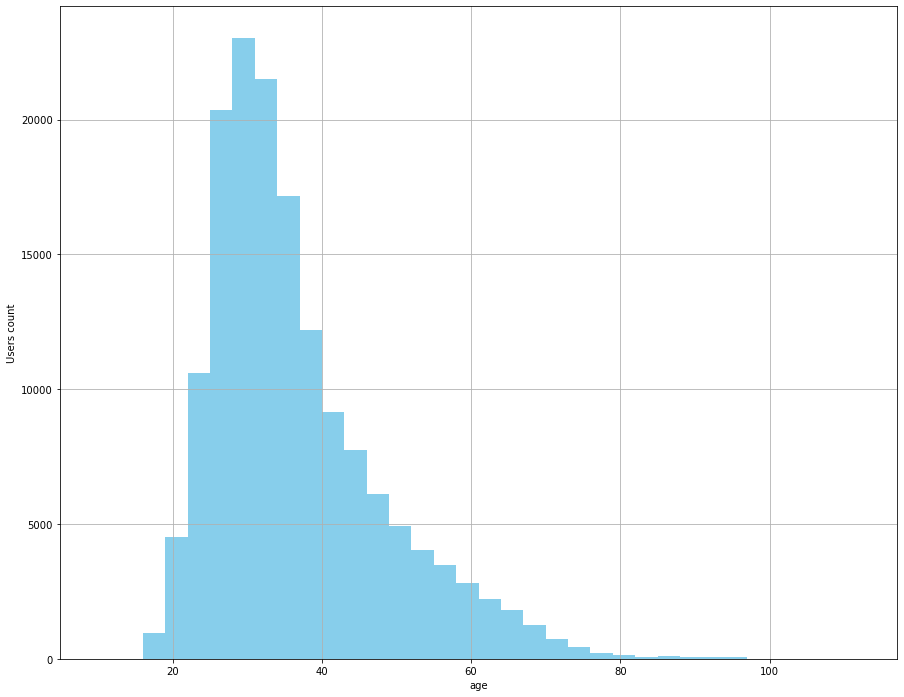

In [27]:
binwidth = 3
users.age.dropna().hist(range=(10, 110),bins=range(10, 110 + binwidth, binwidth), color = 'skyBlue');
plt.rcParams["figure.figsize"] = (10,7)
plt.xlabel('age');
plt.ylabel('Users count');

users.age.value_counts()

We can conclude that most travelers are at their 30's

## 4.Users count of every affiliate_channel type

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

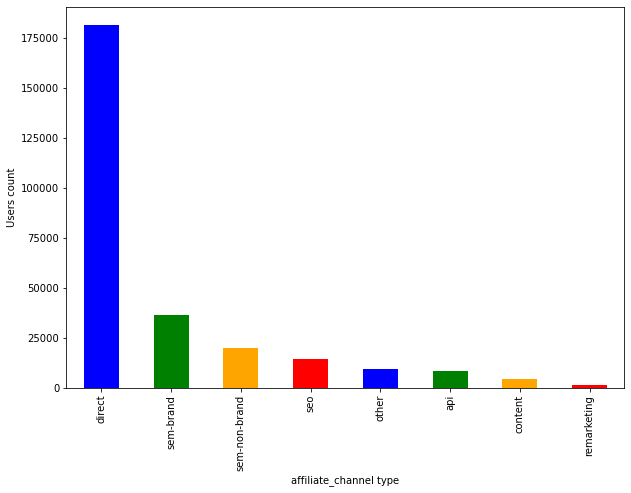

In [29]:
users.affiliate_channel.value_counts(dropna=False).plot(kind = 'bar', color = colors)
plt.rcParams["figure.figsize"] = (10,7)
plt.ylabel('Users count')
plt.xlabel('affiliate_channel type');
users.affiliate_channel.value_counts()

## 5.Users count of every affiliate_provider type

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

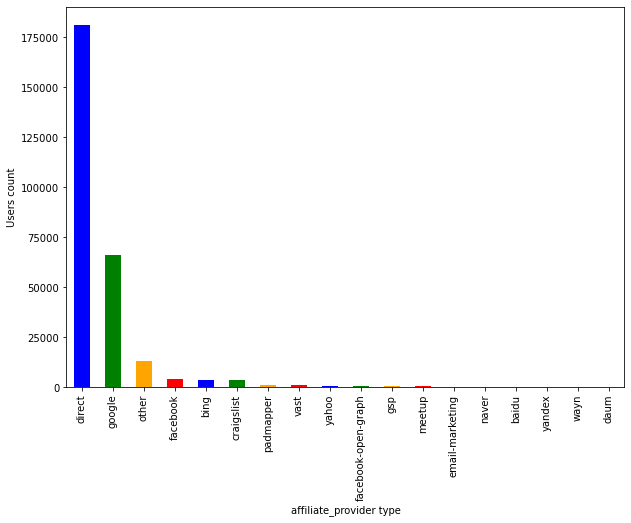

In [23]:
users.affiliate_provider.value_counts(dropna=False).plot(kind = 'bar', color = colors)
plt.rcParams["figure.figsize"] = (10,7)
plt.ylabel('Users count')
plt.xlabel('affiliate_provider type');
users.affiliate_provider.value_counts()

It's clearly that most users prefer the direct affiliate provider

## 6.Users count of every first_affiliate_tracked type

untracked        143181
linked            62064
omg               54859
tracked-other      6655
product            2353
marketing           281
local ops            69
Name: first_affiliate_tracked, dtype: int64

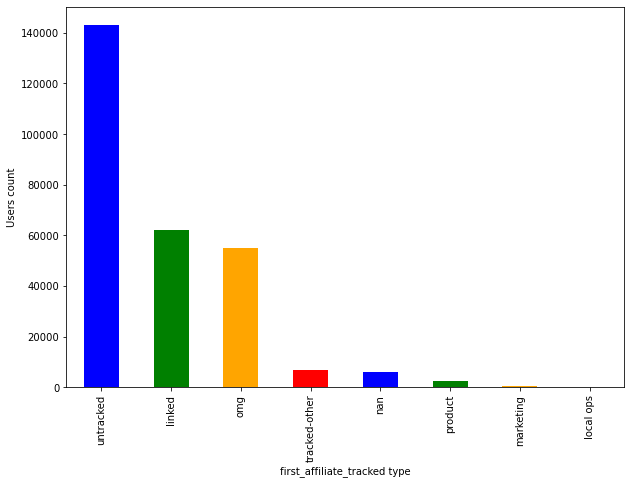

In [24]:
users.first_affiliate_tracked.value_counts(dropna=False).plot(kind = 'bar', color = colors)
plt.rcParams["figure.figsize"] = (10,7)
plt.ylabel('Users count')
plt.xlabel('first_affiliate_tracked type');
users.first_affiliate_tracked.value_counts()

## 7.Users percentage with signup_method

basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

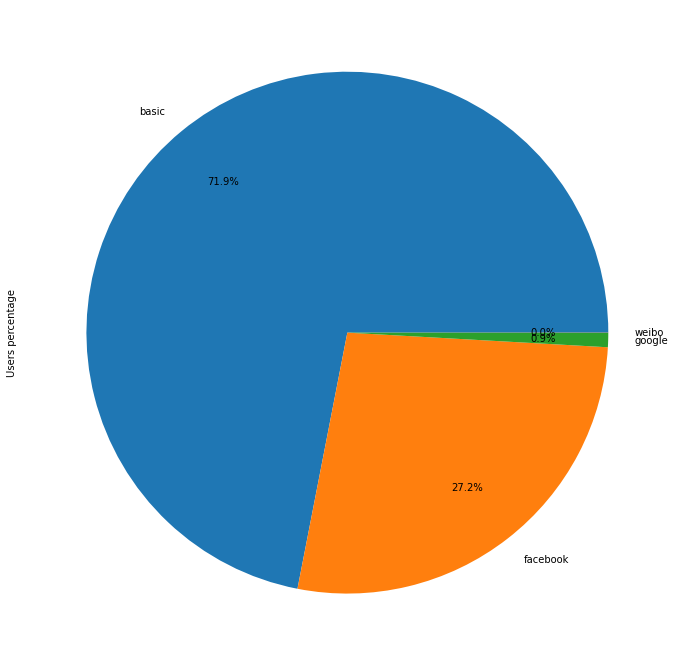

In [26]:
users.signup_method.value_counts(dropna=False).plot(kind = 'pie', autopct='%.1f%%', shadow=False, startangle=0, radius = 1, pctdistance=0.75)
plt.rcParams["figure.figsize"] = (15,12)
plt.ylabel('Users percentage');
users.signup_method.value_counts()

## 8.Users percentage with signup_app

Web        219918
iOS         34593
Android     10519
Moweb       10517
Name: signup_app, dtype: int64

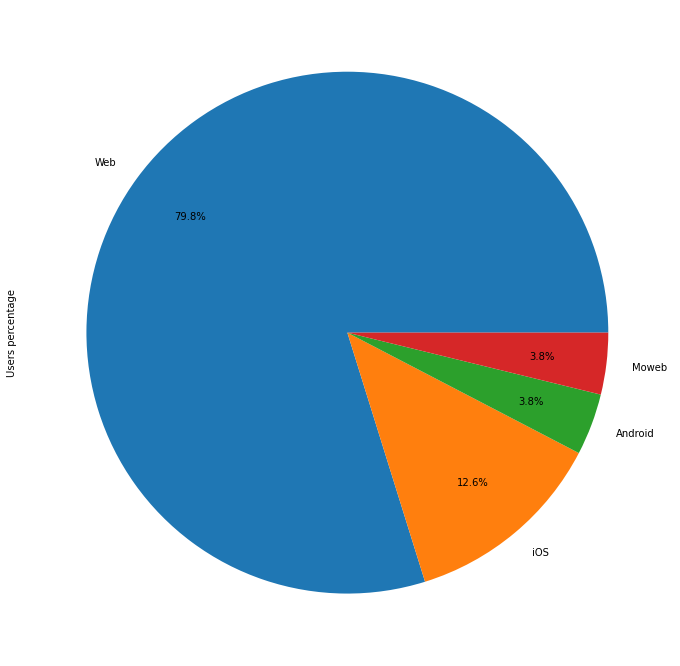

In [11]:
users.signup_app.value_counts(dropna=False).plot(kind = 'pie', autopct='%1.1f%%', startangle=0, radius = 1, pctdistance=0.75)
plt.rcParams["figure.figsize"] = (15,12)
plt.ylabel('Users percentage');
users.signup_app.value_counts()

## 9.Users count with first_device_type

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

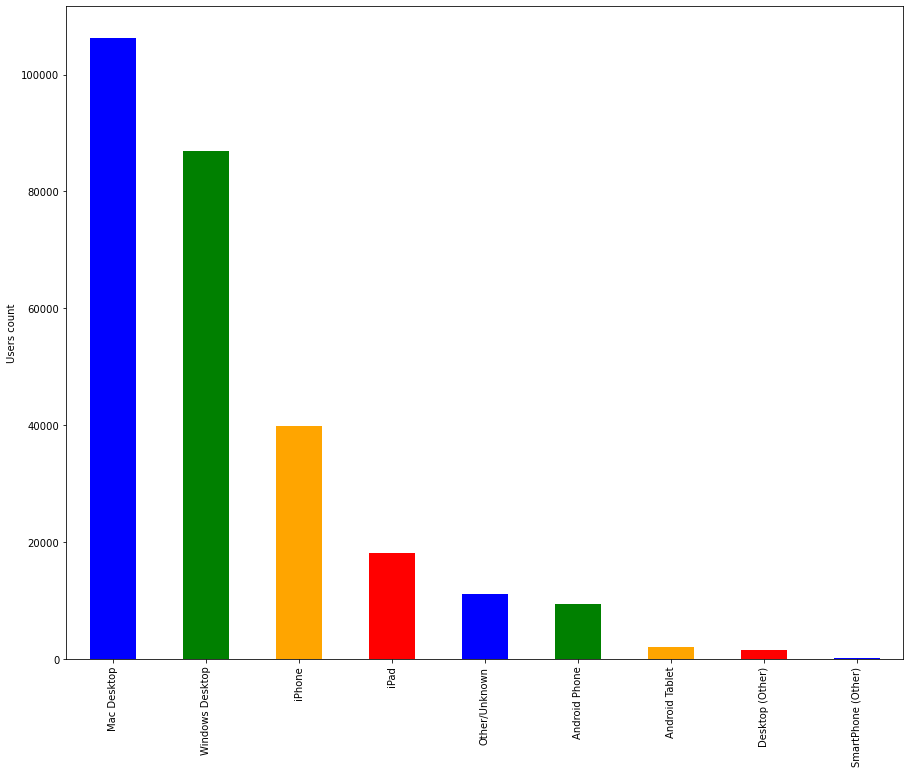

In [12]:
users.first_device_type.value_counts(dropna=False).plot(kind = 'bar', color = colors)
plt.rcParams["figure.figsize"] = (15,12)
plt.ylabel('Users count');
users.first_device_type.value_counts()

## 10.Users count with first_browser

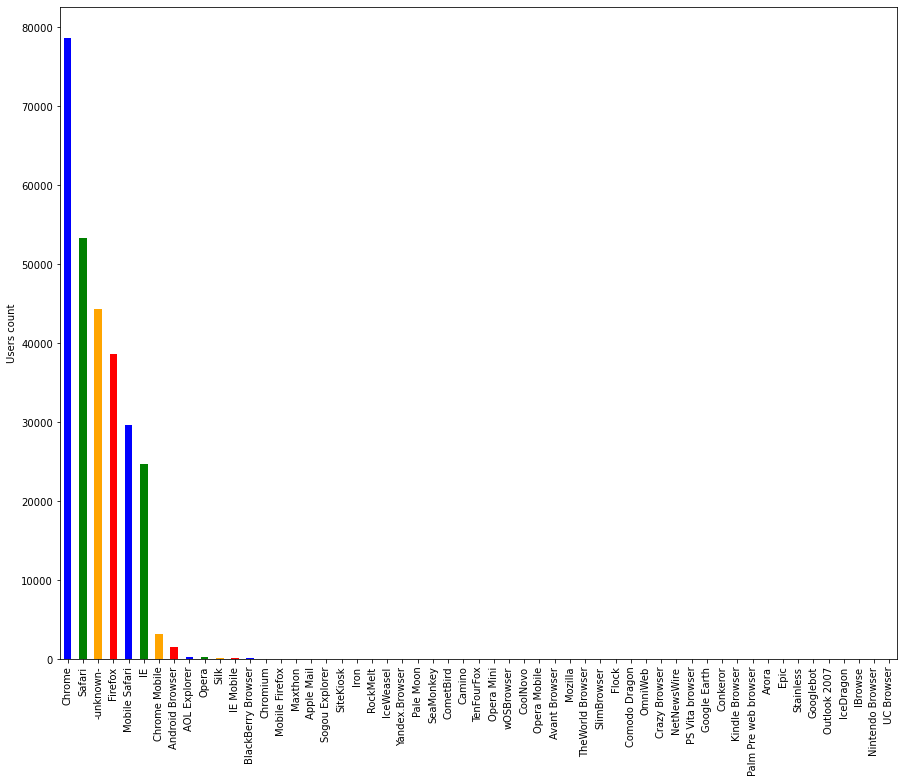

In [13]:
users.first_browser.value_counts(dropna=False).plot(kind = 'bar',  color = colors)
plt.rcParams["figure.figsize"] = (15,12)
plt.ylabel('Users count');
#users.first_browser.value_counts()

## 11.Travelers percentage with country_destination

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

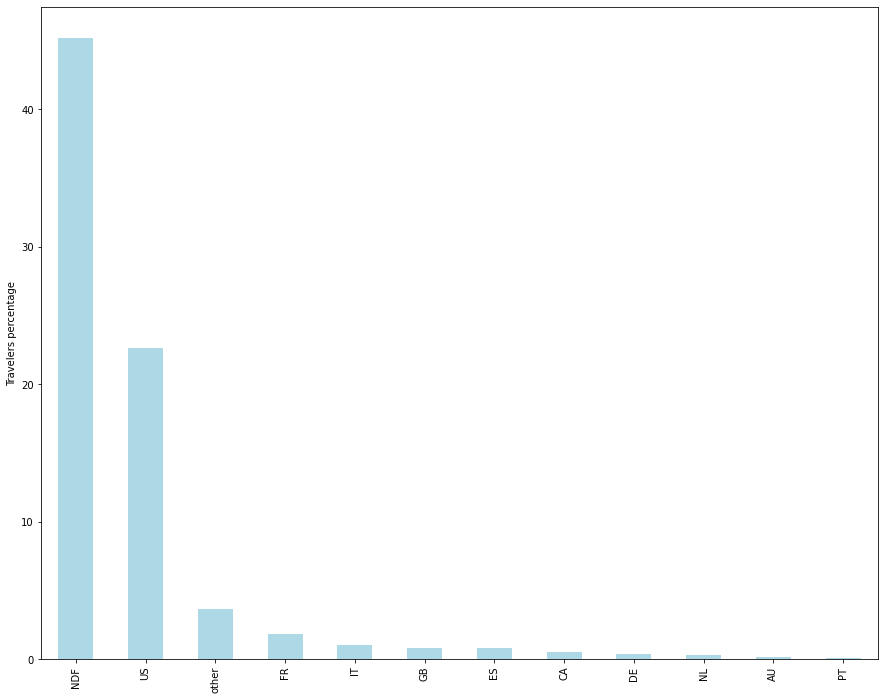

In [14]:
travelers_percentage = users.country_destination.value_counts() / users.shape[0] * 100
travelers_percentage.plot(kind = 'bar',  color = 'lightBlue')
plt.rcParams["figure.figsize"] = (15,12)
plt.ylabel('Travelers percentage');
users.country_destination.value_counts()

Away from the NDF data, US is the most traveled country

## 12.Ages' variation with countries

In [15]:
users.age.describe()
print("Apparenetly we have a lot of null values in the age column, like about " + str(users.age.isna().sum()) +"!")

Apparenetly we have a lot of null values in the age column, like about 116866!


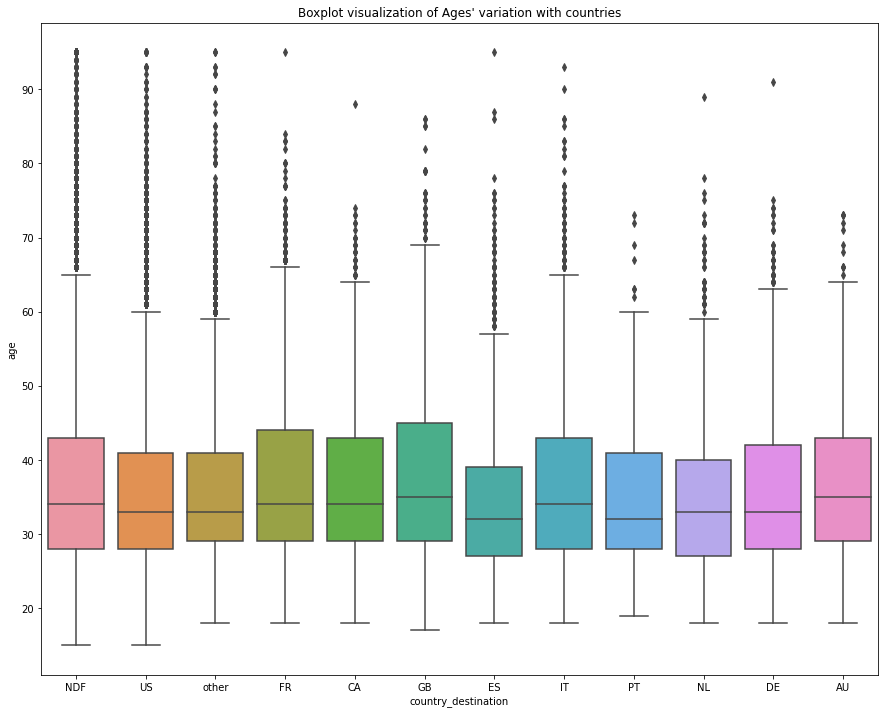

In [30]:
#Let's ignore the users with age less-than 15 and greater-than 95,so the data would make more sense
edit_users = users
edit_users.loc[(users.age > 95) | (users.age < 15), 'age'] = np.nan

plt.figure(figsize=(15,12))
sns.boxplot(x=users.country_destination,y=users.age, data=users.dropna())
plt.xlabel('country_destination')
plt.title('Boxplot visualization of Ages\' variation with countries')
plt.show()